In [150]:
import numpy as np
import pylab
import re

# cities in our weather data
CITIES = [
    'BOSTON',
    'SEATTLE',
    'SAN DIEGO',
    'PHILADELPHIA',
    'PHOENIX',
    'LAS VEGAS',
    'CHARLOTTE',
    'DALLAS',
    'BALTIMORE',
    'SAN JUAN',
    'LOS ANGELES',
    'MIAMI',
    'NEW ORLEANS',
    'ALBUQUERQUE',
    'PORTLAND',
    'SAN FRANCISCO',
    'TAMPA',
    'NEW YORK',
    'DETROIT',
    'ST LOUIS',
    'CHICAGO'
]

INTERVAL_1 = list(range(1961, 2006))
INTERVAL_2 = list(range(2006, 2016))

"""
Begin helper code
"""
class Climate(object):
    """
    The collection of temperature records loaded from given csv file
    """
    def __init__(self, filename):
        """
        Initialize a Climate instance, which stores the temperature records
        loaded from a given csv file specified by filename.

        Args:
            filename: name of the csv file (str)
        """
        self.rawdata = {}

        # f = open(filename, 'r')
        f = open("/home/sscf/mitx_python/6.00.2x/week_4/ProblemSet4/data.csv", 'r')
        header = f.readline().strip().split(',')
        for line in f:
            items = line.strip().split(',')

            date = re.match('(\d\d\d\d)(\d\d)(\d\d)', items[header.index('DATE')])
            year = int(date.group(1))
            month = int(date.group(2))
            day = int(date.group(3))

            city = items[header.index('CITY')]
            temperature = float(items[header.index('TEMP')])
            if city not in self.rawdata:
                self.rawdata[city] = {}
            if year not in self.rawdata[city]:
                self.rawdata[city][year] = {}
            if month not in self.rawdata[city][year]:
                self.rawdata[city][year][month] = {}
            self.rawdata[city][year][month][day] = temperature
            
        f.close()

    def get_yearly_temp(self, city, year):
        """
        Get the daily temperatures for the given year and city.

        Args:
            city: city name (str)
            year: the year to get the data for (int)

        Returns:
            a numpy 1-d array of daily temperatures for the specified year and
            city
        """
        temperatures = []
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        for month in range(1, 13):
            for day in range(1, 32):
                if day in self.rawdata[city][year][month]:
                    temperatures.append(self.rawdata[city][year][month][day])
        return np.array(temperatures)

    def get_daily_temp(self, city, month, day, year):
        """
        Get the daily temperature for the given city and time (year + date).

        Args:
            city: city name (str)
            month: the month to get the data for (int, where January = 1,
                December = 12)
            day: the day to get the data for (int, where 1st day of month = 1)
            year: the year to get the data for (int)

        Returns:
            a float of the daily temperature for the specified time (year +
            date) and city
        """
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        assert month in self.rawdata[city][year], "provided month is not available"
        assert day in self.rawdata[city][year][month], "provided day is not available"
        return self.rawdata[city][year][month][day]



"""
End helper code
"""

'\nEnd helper code\n'

In [151]:
# Problem 1
def generate_models(x, y, degs):
    """
    Generate regression models by fitting a polynomial for each degree in degs
    to points (x, y).
    Args:
        x: a list with length N, representing the x-coords of N sample points
        y: a list with length N, representing the y-coords of N sample points
        degs: a list of degrees of the fitting polynomial
    Returns:
        a list of numpy arrays, where each array is a 1-d array of coefficients
        that minimizes the squared error of the fitting polynomial
    """
    x_arr = np.array(x)
    y_arr = np.array(y)
    coefs = []
    for deg in degs:
        coefs.append(np.polyfit(x_arr, y_arr, deg))  # HIGHEST POWER FIRST!
    return coefs

In [152]:
# Problem 2
def r_squared(y, estimated):
    """
    Calculate the R-squared error term.
    Args:
        y: list with length N, representing the y-coords of N sample points
        estimated: a list of values estimated by the regression model
    Returns:
        a float for the R-squared error term
    """
    y_arr = np.array(y)
    yhat_arr = np.array(estimated)
    return 1 - sum((y_arr - yhat_arr)**2) / sum((y_arr - y_arr.mean())**2)

In [153]:
import matplotlib.pyplot as plt

# Problem 3
def evaluate_models_on_training(x, y, models):
    """
    For each regression model, compute the R-square for this model with the
    standard error over slope of a linear regression line (only if the model is
    linear), and plot the data along with the best fit curve.

    For the plots, you should plot data points (x,y) as blue dots and your best
    fit curve (aka model) as a red solid line. You should also label the axes
    of this figure appropriately and have a title reporting the following
    information:
        degree of your regression model,
        R-square of your model evaluated on the given data points
    Args:
        x: a list of length N, representing the x-coords of N sample points
        y: a list of length N, representing the y-coords of N sample points
        models: a list containing the regression models you want to apply to
            your data. Each model is a numpy array storing the coefficients of
            a polynomial.
    Returns:
        None
    """
    x_arr = np.array(x)
    y_arr = np.array(y)
    yhat_arr = np.zeros(len(x_arr))
    fig, axs = plt.subplots(len(models), 1, sharex=True)
    if len(models) == 1:
        axs = [axs]
    for i in range(len(models)):
        axs[i].plot(x_arr, y_arr, "bo", label="Data")
        for idx, coef in enumerate(models[i]):
            yhat_arr += coef * x_arr**(len(models[i]) - idx - 1)
            print("yhat_arr =", yhat_arr)
        r2 = r_squared(y, list(yhat_arr))
        axs[i].plot(x_arr, yhat_arr, "r-", label="OLS Line")
        axs[i].set(title=f"Dimensions = {len(models)}, $R^2 =$ {r2}")
    plt.tight_layout()
    fig.legend(loc="upper left")

In [154]:
# Trial and error
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
models = [(5,)]
x_arr = np.array(x)

# z_arr = np.zeros(len(x_arr))
# z_arr += 10 * x_arr ** 0
# z_arr

# evaluate_models_on_training(x, y, models)

list(x_arr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

yhat_arr = [59.32089592 59.35114625 59.38139657 59.4116469  59.44189723 59.47214756
 59.50239789 59.53264822 59.56289855 59.59314888 59.62339921 59.65364954
 59.68389987 59.7141502  59.74440053 59.77465086 59.80490119 59.83515152
 59.86540184 59.89565217 59.9259025  59.95615283 59.98640316 60.01665349
 60.04690382 60.07715415 60.10740448 60.13765481 60.16790514 60.19815547
 60.2284058  60.25865613 60.28890646 60.31915679 60.34940711 60.37965744
 60.40990777 60.4401581  60.47040843 60.50065876 60.53090909 60.56115942
 60.59140975 60.62166008 60.65191041]
yhat_arr = [-2.91328502 -2.88303469 -2.85278437 -2.82253404 -2.79228371 -2.76203338
 -2.73178305 -2.70153272 -2.67128239 -2.64103206 -2.61078173 -2.5805314
 -2.55028107 -2.52003074 -2.48978041 -2.45953008 -2.42927975 -2.39902942
 -2.3687791  -2.33852877 -2.30827844 -2.27802811 -2.24777778 -2.21752745
 -2.18727712 -2.15702679 -2.12677646 -2.09652613 -2.0662758  -2.03602547
 -2.00577514 -1.97552481 -1.94527448 -1.91502415 -1.88477383 -1.8

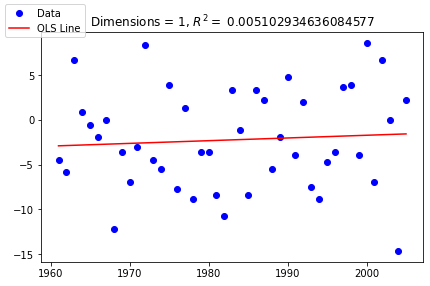

In [155]:
### Begining of program
raw_data = Climate('data.csv')

# Problem 3
y = []
x = INTERVAL_1
for year in INTERVAL_1:
    y.append(raw_data.get_daily_temp('BOSTON', 1, 10, year))
models = generate_models(x, y, [1])
evaluate_models_on_training(x, y, models)

yhat_arr = [25.57460228 25.58764389 25.6006855  25.61372711 25.62676873 25.63981034
 25.65285195 25.66589356 25.67893518 25.69197679 25.7050184  25.71806001
 25.73110163 25.74414324 25.75718485 25.77022647 25.78326808 25.79630969
 25.8093513  25.82239292 25.83543453 25.84847614 25.86151775 25.87455937
 25.88760098 25.90064259 25.9136842  25.92672582 25.93976743 25.95280904
 25.96585065 25.97889227 25.99193388 26.00497549 26.0180171  26.03105872
 26.04410033 26.05714194 26.07018355 26.08322517 26.09626678 26.10930839
 26.12235    26.13539162 26.14843323]
yhat_arr = [10.5028642  10.51590581 10.52894742 10.54198904 10.55503065 10.56807226
 10.58111387 10.59415549 10.6071971  10.62023871 10.63328032 10.64632194
 10.65936355 10.67240516 10.68544677 10.69848839 10.71153    10.72457161
 10.73761322 10.75065484 10.76369645 10.77673806 10.78977967 10.80282129
 10.8158629  10.82890451 10.84194612 10.85498774 10.86802935 10.88107096
 10.89411257 10.90715419 10.9201958  10.93323741 10.94627903 10.

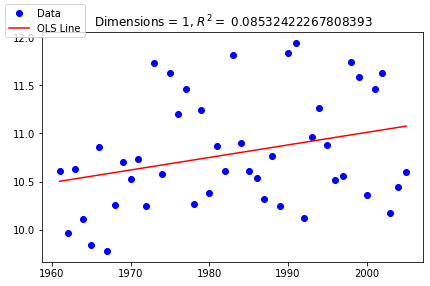

In [157]:
# Problem 4: FILL IN MISSING CODE TO GENERATE y VALUES
x1 = INTERVAL_1
x2 = INTERVAL_2
y = []
# MISSING LINES
raw_data = Climate('data.csv')
for year in INTERVAL_1:
    y.append(raw_data.get_yearly_temp("BOSTON", year).mean())

models = generate_models(x1, y, [1])    
evaluate_models_on_training(x1, y, models)